In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Image Overlay

In [2]:
## quick POC to try how image overlays would work. 
pixels = np.ones(shape=(10,10,1))
canvas = np.zeros(shape=(100,100,1))
temp = np.zeros(shape=(28,28))

In [3]:
## lets see if we can render canvas as image
## helper function to plot the mnist data instances
def plot_canvas(canvas_data):
    plt.imshow(canvas_data)  # Use 'gray' colormap to render grayscale
    plt.axis("off") # Remove axes for better visualization    
    plt.show()

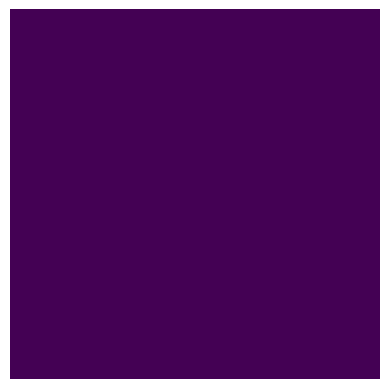

In [4]:
## lets say we want to put the pixels on top, left corner of canvas so 
plot_canvas(canvas)

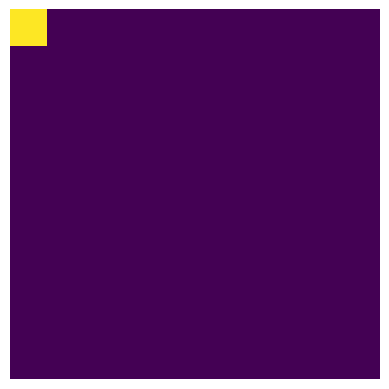

In [5]:
## lets overlay the pixels which should be a white blob on top left corner of canvas
canvas[0:10,0:10] = pixels
plot_canvas(canvas)

In [6]:
temp1 = [1,2,3,4]
[a,b,c,d] = temp1
a

1

In [7]:
import numpy as np
np.random.randint(0, high=100)

90

In [8]:
import os 
dir_path = os.getcwd()
dir_path


'/home/gaurangdave/workspace/mnist_object_detection/notebooks'

In [9]:
import tensorflow as tf

# The "warehouse" of scores
params = tf.constant([[10, 20, 30, 40],
                      [50, 60, 70, 80],
                      [90, 11, 22, 33],
                      [44, 55, 66, 77]])

# The list of "GPS coordinates"
indices = tf.constant([[0, 1],   # Get the score at (row=0, col=1)
                       [3, 2],   # Get the score at (row=3, col=2)
                       [1, 0]])  # Get the score at (row=1, col=0)


tf.gather_nd(params=params, indices=indices)

2025-09-10 12:59:07.466728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757534347.512794   32186 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757534347.534221   32186 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1757534347.641754   32186 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757534347.641837   32186 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1757534347.641840   32186 computation_placer.cc:177] computation placer alr

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([20, 66, 50], dtype=int32)>

In [10]:
import tensorflow as tf

# The same "warehouse" of scores
params = tf.constant([[10, 20, 30, 40],
                      [50, 60, 70, 80],
                      [90, 11, 22, 33],
                      [44, 55, 66, 77]])

# The list of row indices you want to select
indices = tf.constant([[2],   # Get the entire row at index 2
                       [0]])  # Get the entire row at index 0

tf.gather_nd(params=params, indices=indices)

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[90, 11, 22, 33],
       [10, 20, 30, 40]], dtype=int32)>

In [11]:
import tensorflow as tf

# A batch of 3 matrices, shape (3, 4, 4)
params = tf.constant([
  [[10, 20, 30, 40],   # Matrix 0
   [50, 60, 70, 80],
   [90, 11, 22, 33],
   [44, 55, 66, 77]],

  [[110, 120, 130, 140], # Matrix 1
   [150, 160, 170, 180],
   [190, 111, 122, 133],
   [144, 155, 166, 177]],

  [[210, 220, 230, 240], # Matrix 2
   [250, 260, 270, 280],
   [290, 211, 222, 233],
   [244, 255, 266, 277]]
])

# The list of row indices to gather.
# We want to get row 2 from Matrix 0, row 0 from Matrix 1, and row 3 from Matrix 2.
indices = tf.constant([[2],   # Row index for Matrix 0
                       [0],   # Row index for Matrix 1
                       [3]])  # Row index for Matrix 2


tf.gather_nd(params=params, indices=indices, batch_dims=1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 90,  11,  22,  33],
       [110, 120, 130, 140],
       [244, 255, 266, 277]], dtype=int32)>

# TensorFlow Experiments

In [12]:
my_tensor = tf.constant([[0, 5, 0],
 [0, 8, 2],
 [0, 3, 0]])

In [13]:
my_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 5, 0],
       [0, 8, 2],
       [0, 3, 0]], dtype=int32)>

In [14]:
tf.reduce_sum(my_tensor, keepdims=True, axis=1)

<tf.Tensor: shape=(3, 1), dtype=int32, numpy=
array([[ 5],
       [10],
       [ 3]], dtype=int32)>

In [15]:
tf.reduce_sum(my_tensor, keepdims=True, axis=0)

<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[ 0, 16,  2]], dtype=int32)>

## Generation 1,28 and 28,1 tensors 

In [16]:
active_row_indices = tf.random.uniform(shape=(5,1),minval=0,maxval=28, dtype=tf.int32)
row_zeros = tf.zeros(shape=(5,1), dtype=tf.int32)

active_row_indices = tf.concat(values = [active_row_indices,row_zeros], axis=1)
active_row_indices

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[ 5,  0],
       [13,  0],
       [22,  0],
       [24,  0],
       [24,  0]], dtype=int32)>

In [17]:
## create tensors

# A column tensor of shape (28, 1). Think of it as a vertical strip.
# Each element represents the "activity" of a single row.
active_rows = tf.zeros(shape=(28,1), dtype=tf.float32)

# A row tensor of shape (1, 28). Think of it as a horizontal strip.
# Each element represents the "activity" of a single column.
active_cols = tf.zeros(shape=(1,28), dtype=tf.float32)


## generate random indices to update

# To update 5 specific rows in `active_rows`, we need 5 indices.
# The shape is (5, 1) because `active_rows` is a 2D tensor, but since it only has
# one column, TensorFlow lets us use a simpler index with just one coordinate (the row number).
active_row_indices = tf.random.uniform(shape=(5,1), minval=0, maxval=28, dtype=tf.int32)


# To update 5 specific columns in `active_cols`, we still need 5 indices.
# We create a (5, 1) tensor of random column numbers first.
active_col_indices_random = tf.random.uniform(shape=(5,1), minval=0, maxval=28, dtype=tf.int32)
# We also need a (5, 1) tensor of row numbers. Since `active_cols` only has one row, this is always 0.
column_zeros = tf.zeros(shape=(5,1), dtype=tf.int32)
# We concatenate them to create the final indices.
# The shape is (5, 2) because we are providing 5 full (row, column) coordinates
# to precisely identify each element in the 2D `active_cols` tensor.
active_col_indices = tf.concat(values=[column_zeros, active_col_indices_random], axis=1)


## create update tensor

# --- INTUITION FOR `row_updates` ---
# We are updating 5 rows. Each `index` in `active_row_indices` points to a slice of
# `active_rows`. The shape of this slice is (1,).
# Therefore, our `updates` tensor must provide 5 "packages", where each package has a shape of (1,).
# The final shape is (num_updates, slice_shape_part_1) -> (5, 1).
row_updates = tf.ones(shape=(5,1), dtype=tf.float32)

# --- INTUITION FOR `col_updates` ---
# We are updating 5 columns. Each `(row, col)` coordinate in `active_col_indices` points
# to a single SCALAR element within `active_cols`. The shape of this slice is ().
# Therefore, our `updates` tensor must provide 5 "packages", where each package is a scalar.
# A list of 5 scalars is a 1D tensor of shape [5].
col_updates = tf.ones(shape=[5], dtype=tf.float32)


# Perform the updates
updated_rows = tf.tensor_scatter_nd_update(active_rows, active_row_indices, updates=row_updates)
updated_cols = tf.tensor_scatter_nd_update(active_cols, active_col_indices, updates=col_updates)

In [18]:
@tf.function
def cond_prototype(tens_1, tens_2):
    if tens_1 > tens_2:
        return tens_1
    else:
        return tens_2
    
    
# cond_prototype(tf.constant(3),tf.constant(2))
cond_prototype(3,2)


<tf.Tensor: shape=(), dtype=int32, numpy=3>